# Содержание

1. [Изучение данных](#info_id)
2. [Исследовательский анализ данных](#analysis_id)
3. [Вывод](#conclusion_id)



<a id="info_id"></a>
### Изучение данных

to do:


1. Прочтем данные;
2. Выполним проверку на пропущенные значения, дибликаты.
3. Проверим на соответствие типа данных






In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_model.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [ ]:
df_city.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [ ]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
df_model.duplicated().sum()

0

In [ ]:
df_city.duplicated().sum()

0

**Вывод**
***
Пропусков и дубликатов в данных нет.  
Отклонений в типах данных нет.



<a id="analysis_id"></a>
### Исследовательский анализ данных

to do:
1. Выбрать топ-10 городов по количеству рейсов;
2. Построить графики:
    - модели самолетов и количество рейсов;
    - города и количество рейсов;
    - топ-10 городов и количество рейсов.
3. Сделать выводы по каждому из графиков, пояснить результат.

Выберем топ-10 городов по количеству рейсов

In [ ]:
df_city_top = df_city.sort_values(by='average_flights', ascending=False).head(10)
df_city_top

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Постороим графики распределения количества рейсов в зависимости от модели самолета и города прибытия

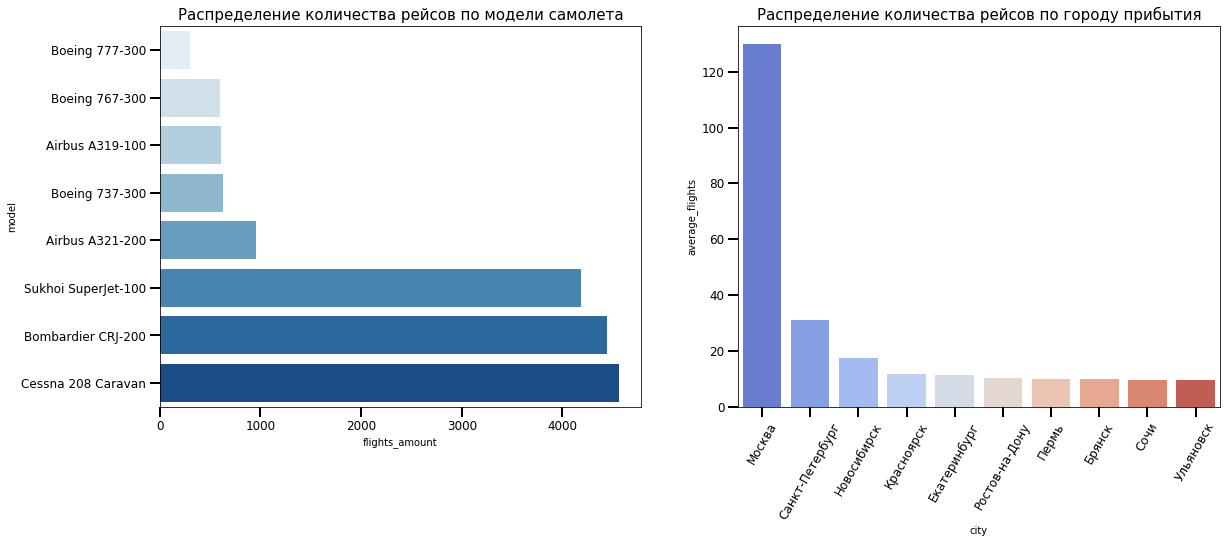

In [ ]:
# Создадим одну строку с 2 колонками и зададим размер для графика
fig, axes = plt.subplots(1,2, figsize=(19, 7))

# График: Количество рейсов в разрезе модели самолета
sns.barplot(x='flights_amount', y='model', data=df_model.sort_values(by='flights_amount'), palette='Blues', ax=axes[0])
plt.sca(axes[0])
plt.title('Распределение количества рейсов по модели самолета', fontsize=15)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)

# График: Количество рейсов по городу прибытия (Топ-10)
sns.barplot(x='city', y='average_flights', data=df_city_top, palette='coolwarm', ax=axes[1])
plt.sca(axes[1])
plt.title('Распределение количества рейсов по городу прибытия', fontsize=15)
plt.xticks(rotation=60)
plt.tick_params(axis = 'both', which = 'major', length = 10, width = 2, labelsize = 12)


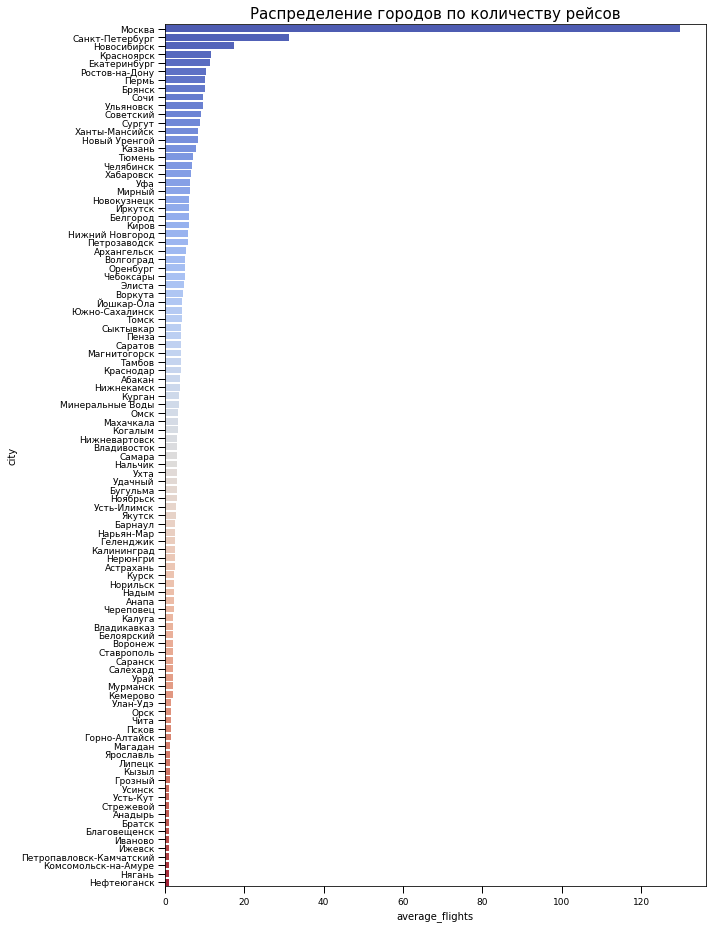

In [ ]:
# График: Количество рейсов по городу прибытия 
fig, ax = plt.subplots(figsize=(10,13))
sns.barplot(x='average_flights', y='city', data=df_city.sort_values(by='average_flights', ascending=False), palette='coolwarm')
plt.title('Распределение городов по количеству рейсов', fontsize=15)
plt.tick_params(axis = 'both', which = 'major', length = 7, width = 1, labelsize = 9)
fig.tight_layout()

<a id="conclusion_id"></a>
### Вывод
***
**Результаты анализа по городам прибытия**  

Исследование показало, что большинство городов *(95% или 96 городов из 101)* принимают в день не более 10 рейсов. Можно выделить топ-3 мегаполиса, у которых это количество в разы больше:
- Москва: в среднем 130 рейсов в день
- Санкт-Петербург: в среднем 30 рейсов в день
- Новосибирск: в среднем 17 рейсов в день

Это объъяснимо тем, что в этих городах размещаются крупные бизнес центры, в них проходят мировые конференции и форумы, а также эти города являются транзитными:  
- для центра - Москва
- для востока - Новосибирск

Стоит отметить город Сочи.   
Данные за август месяц, а количество рейсов в этом городе уступает Перми и Брянску.  
То есть количество перелетов с целью курортного отдыха не превысило количество рейсов с иной потребностью, в другие города.  
Можно сделать предположение, что Брянск граничит с Европой, а Пермь является предуральем, где сосредоточены крупные производства.То есть перелеты в эти города связаны с бизнес визитом.
***
**Результаты анализа по моделям самолетов** 

При проведении исследования распределения количества рейсов в зависимости от модели самолета мы прибегли к поиску на внешних источниках дополнительной информации о моделях самолетов.  
Анализ показал, что наименьшее количество рейсов за месяц выполняют самолеты моделей *Boeing* и *Airbus* - не более 100 рейсов. Это самолеты зарубежного производства, а значит их количество в парке будет меньше чем отечественных.   
Один из таких - *Sukhoi SuperJet-100*. Модель этого самолета выполняет  4000 рейсов в месяц - именно на эту нее приходится наибольшая доля пассажирский перевозок.  
Наибольшее количество рейсов (4500) выполняют модели самолетов *Bombardier CRJ-200* и *Cessna 208 Caravan*. Это самолеты с небольшим количеством мест от 15 до 50. Часто используются в бизнес перелетах или гражданской (некоммерческой), военной авиацией.  

Исходя из вышеуказанного можно предположить, что наибольшее количество рейсов приходится не на пассажирские перелеты, а на целевые, связанные:
- с бизнесом;
- с гражданскими, некоммерческим перелетами *(МЧС, Мед.сфера или соц.сфера)*
- с перелетами представителей гос. органов власти.